In [74]:
from PlayerClass import Player
from TeamClass import Team
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
'''
What if comparing averages isnt the best, can we compare the distrubtion?
For each year, for each stat, get the distribution of the stat from players
for that year, and graph for all teams on same graph, noting ranking for
teams that year. Maybe this will show something, like times with
a larger range of a certain stat score lower or higher.

'''

In [142]:
# next we will make a function that can get the distrubtion of batting average for a team
def bat(team, year):
    values = []
    for player in team.players.values():
        if year in player.bat_avg.keys():
            values.append(player.bat_avg[year])
    return values

In [281]:
# and one for era
def era(team, year):
    values = []
    for player in team.players.values():
        if year in player.ERA.keys():
            values.append(player.ERA[year])
    return values

In [287]:
# and one for home runs pitched
def homeruns_pitched(team, year):
    values = []
    for player in team.players.values():
        if year in player.pitch_hr.keys():
            values.append(player.pitch_hr[year])
    return values

In [171]:
# one for home runs hit
def homeruns_hit(team, year):
    values = []
    for player in team.players.values():
        if year in player.bat_hr.keys():
            values.append(player.bat_hr[year])
    return values

In [143]:
# takes in function and year and gets stats for all teams for that year, return dataframe
def stat_teams(func, year, sox, dodge, yank, ast):
    soxs = func(sox, year)
    dodges = func(dodge, year)
    yanks = func(yank, year)
    asts = func(ast, year)
    totals = {"Red Sox" : soxs, "Dodgers" : dodges, "Yankees": yanks, "Astros" : asts}
    df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in totals.items() ]))
    return df

In [181]:
# input a stat, returns dict with dataframe for each year's stats
def all_years(func, sox, dodge, yank, ast):
    stats19 = stat_teams(func, "2019", sox[0], dodge[0], yank[0], ast[0])
    stats18 = stat_teams(func, "2018", sox[1], dodge[1], yank[1], ast[1])
    stats17 = stat_teams(func, "2017", sox[2], dodge[2], yank[2], ast[2])
    stats16 = stat_teams(func, "2016", sox[3], dodge[3], yank[3], ast[3])
    stats = {"2019" : stats19, "2018" : stats18, "2017" : stats17, "2016" : stats16}
    return stats

In [277]:
# this function graphs all 4 years of a stat
def graph(data, title, xlabel, ylabel, xlim = None):
    
    figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = "all", sharey = "all", figsize=(15,5))
    figure.suptitle(title)
    figure.supxlabel(xlabel)
    figure.supylabel(ylabel)
    
    data["2019"].plot.kde(bw_method=0.2, ax = ax1)
    ax1.set_xlim(xlim)
    ax1.set_title("2019")
    
    data["2018"].plot.kde(bw_method=0.2, ax = ax2)
    ax2.set_xlim(xlim)
    ax2.set_title("2018")
    
    data["2017"].plot.kde(bw_method=0.2, ax = ax3)
    ax3.set_xlim(xlim)
    ax3.set_title("2017")
    
    data["2016"].plot.kde(bw_method=0.2, ax = ax4)
    ax4.set_xlim(xlim)
    ax4.set_title("2016")
    

In [180]:
# First we'll create all the teams for each year
dodgers = [Team("LAN", "2019"), Team("LAN", "2018"), Team("LAN", "2017"), Team("LAN", "2016")]
redsox = [Team("BOS", "2019"), Team("BOS", "2018"), Team("BOS", "2017"), Team("BOS", "2016")]
yankees = [Team("NYA", "2019"), Team("NYA", "2018"), Team("NYA", "2017"), Team("NYA", "2016")]
astros = [Team("HOU", "2019"), Team("HOU", "2018"), Team("HOU", "2017"), Team("HOU", "2016")]

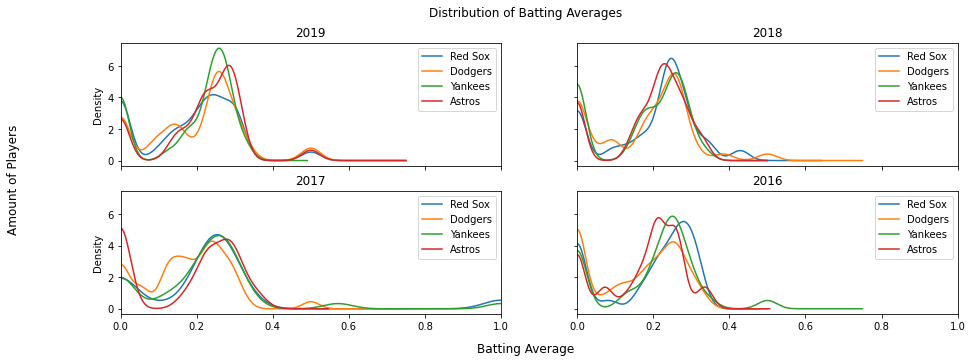

In [272]:
# Now we will call the batting average for all years
bat_avg = all_years(bat, redsox, dodgers, yankees, astros)
# Now we will graph it all!
graph(bat_avg, "Distribution of Batting Averages", "Batting Average", "Amount of Players", (0, 1))

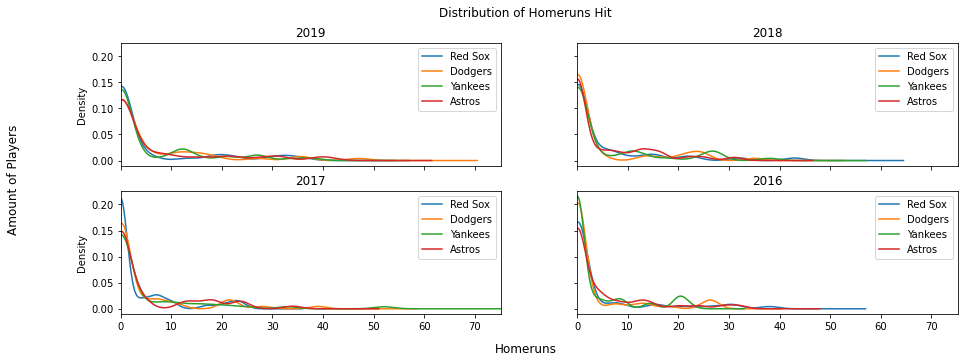

In [284]:
# Let's do the same thing for homeruns
homerunshit = all_years(homeruns_hit, redsox, dodgers, yankees, astros)
graph(homerunshit, "Distribution of Homeruns Hit", "Homeruns", "Amount of Players", (0))

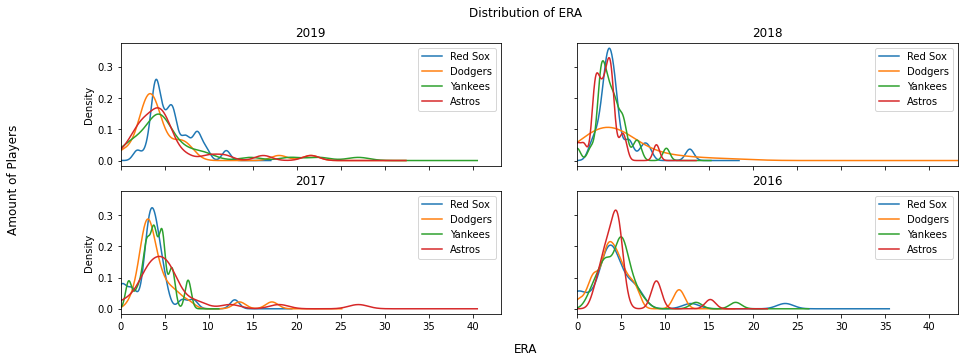

In [283]:
# Let's do the same thing for era
eras = all_years(era, redsox, dodgers, yankees, astros)
graph(eras, "Distribution of ERA", "ERA", "Amount of Players", (0))

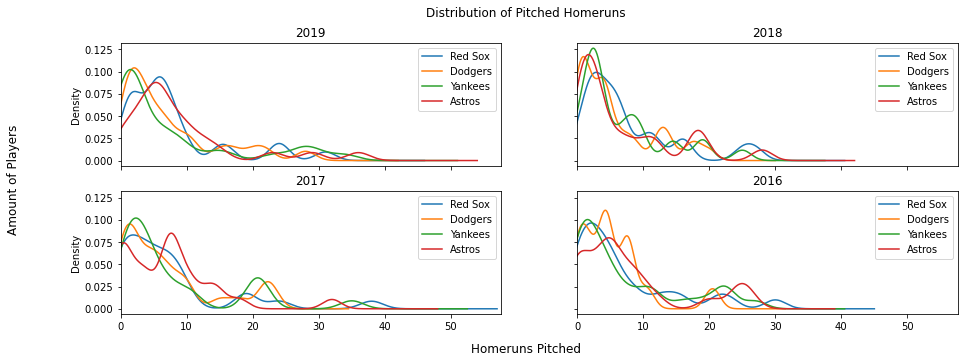

In [288]:
# Let's do the same thing for era
homerunspitch = all_years(homeruns_pitched, redsox, dodgers, yankees, astros)
graph(homerunspitch, "Distribution of Pitched Homeruns", "Homeruns Pitched", "Amount of Players", (0))

Text(0, 0.5, 'Amount of Players')

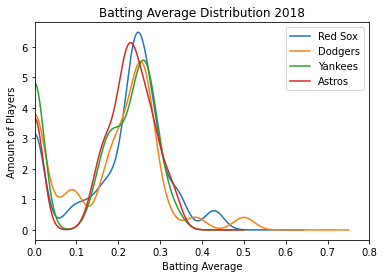

Text(0, 0.5, 'Amount of Players')

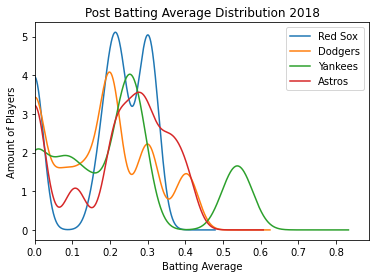